# Scraping, Cleaning, Exploring, & Visualizing NBA Salaries Data

### Step 1: Web-scraping data from BasketballReference

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
URL = 'https://www.basketball-reference.com/contracts/'

In [3]:
website = requests.get(URL)

In [4]:
soup = BeautifulSoup(website.text,'html')

In [7]:
salaries = soup.find_all('table')[0]

In [8]:
salaries

<table class="suppress_glossary sortable stats_table" data-cols-to-freeze=",2" id="team_summary">
<caption>Teams Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr class="over_header">
<th aria-label="" class="over_header center" colspan="2" data-stat=""></th>
<th aria-label="" class="over_header center" colspan="6" data-stat="header_salary">Salary</th>
</tr>
<tr>
<th aria-label="Rk" class="ranker poptip sort_default_asc show_partial_when_sorting right" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Team" class="poptip sort_default_asc left" data-stat="team_name" scope="col">Team</th>
<th aria-label="2023-24" class="poptip center" data-over-header="Salary" data-stat="y1" scope="col">2023-24</th>
<th aria-label="2024-25" class="poptip center" data-over-header="Salary" data-stat="y2" scope="col">2024-25</th>
<th aria-label="2025-26" class="poptip center" data-over-header="Salary" data-stat="y3" scope="col">2025-26</th

In [19]:
# getting column names for table
titles = salaries.find_all('th')[2:10]

In [20]:
titles

[<th aria-label="Rk" class="ranker poptip sort_default_asc show_partial_when_sorting right" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>,
 <th aria-label="Team" class="poptip sort_default_asc left" data-stat="team_name" scope="col">Team</th>,
 <th aria-label="2023-24" class="poptip center" data-over-header="Salary" data-stat="y1" scope="col">2023-24</th>,
 <th aria-label="2024-25" class="poptip center" data-over-header="Salary" data-stat="y2" scope="col">2024-25</th>,
 <th aria-label="2025-26" class="poptip center" data-over-header="Salary" data-stat="y3" scope="col">2025-26</th>,
 <th aria-label="2026-27" class="poptip center" data-over-header="Salary" data-stat="y4" scope="col">2026-27</th>,
 <th aria-label="2027-28" class="poptip center" data-over-header="Salary" data-stat="y5" scope="col">2027-28</th>,
 <th aria-label="2028-29" class="poptip center" data-over-header="Salary" data-stat="y6" scope="col">2028-29</th>]

In [21]:
titles_text = [t.text.strip() for t in titles] # cleaning column names

In [22]:
titles_text

['Rk',
 'Team',
 '2023-24',
 '2024-25',
 '2025-26',
 '2026-27',
 '2027-28',
 '2028-29']

### Step 2: Move data into a Pandas dataframe

In [50]:
df = pd.DataFrame(columns = titles_text)

In [51]:
df

,Rk,Team,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29


In [52]:
column_data = salaries.find_all('tr')[2:]

In [53]:
column_data

[<tr><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" data-stat="team_name"><a href="/contracts/LAC.html">Los Angeles Clippers</a></td><td class="right" csk="185299089" data-stat="y1">$185,299,089</td><td class="right" csk="150613648" data-stat="y2">$150,613,648</td><td class="right" csk="23137638" data-stat="y3">$23,137,638</td><td class="right" csk="4792059" data-stat="y4">$4,792,059</td><td class="right iz" data-stat="y5"></td><td class="right iz" data-stat="y6"></td></tr>,
 <tr><th class="right" csk="2" data-stat="ranker" scope="row">2</th><td class="left" data-stat="team_name"><a href="/contracts/ATL.html">Atlanta Hawks</a></td><td class="right" csk="181282107" data-stat="y1">$181,282,107</td><td class="right" csk="135101573" data-stat="y2">$135,101,573</td><td class="right" csk="111429025" data-stat="y3">$111,429,025</td><td class="right" csk="83188502" data-stat="y4">$83,188,502</td><td class="right iz" data-stat="y5"></td><td class="right iz" data

In [54]:
for row in column_data:
    row_data = row.find_all(['th','td'])
    individual_row_data = [r.text.strip() for r in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [55]:
df

,Rk,Team,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29
0,1,Los Angeles Clippers,"$185,299,089","$150,613,648","$23,137,638","$4,792,059",,
1,2,Atlanta Hawks,"$181,282,107","$135,101,573","$111,429,025","$83,188,502",,
2,3,Golden State Warriors,"$180,764,172","$147,127,538","$91,517,992","$35,849,103",,
3,4,Boston Celtics,"$171,350,016","$102,841,470","$52,880,796","$2,406,205",,
4,5,Miami Heat,"$167,188,247","$145,329,917","$148,705,031","$38,939,141",,
5,6,Phoenix Suns,"$166,722,453","$186,725,421","$197,110,293","$114,252,810","$61,063,800",
6,7,Denver Nuggets,"$164,315,730","$171,212,116","$127,530,978","$103,789,081","$61,908,000",
7,8,Philadelphia 76ers,"$164,159,456","$66,209,363","$54,404,000","$58,156,000",,
8,9,New Orleans Pelicans,"$154,448,264","$134,468,185","$81,975,695","$48,561,895","$44,220,000",
9,10,Minnesota Timberwolves,"$149,441,150","$111,615,757","$121,623,970","$57,124,200","$61,063,800",


### Step 3: Cleaning Data

In [57]:
df = df.drop_duplicates()

In [59]:
df.dtypes

Rk         object
Team       object
2023-24    object
2024-25    object
2025-26    object
2026-27    object
2027-28    object
2028-29    object
dtype: object

In [69]:
for column in df:
    df[column] = df[column].str.replace('$','')
    df[column] = df[column].str.replace(',','')

/var/folders/bl/s70bg5fs2b58kc67cgyd09pm0000gn/T/ipykernel_36663/1735942490.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$','')


In [71]:
df.head()

,Rk,Team,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29
0,1,Los Angeles Clippers,185299089,150613648,23137638,4792059,,
1,2,Atlanta Hawks,181282107,135101573,111429025,83188502,,
2,3,Golden State Warriors,180764172,147127538,91517992,35849103,,
3,4,Boston Celtics,171350016,102841470,52880796,2406205,,
4,5,Miami Heat,167188247,145329917,148705031,38939141,,


In [73]:
df.columns

Index(['Rk', 'Team', '2023-24', '2024-25', '2025-26', '2026-27', '2027-28',
       '2028-29'],
      dtype='object')

In [91]:
df[['2023-24', '2024-25', '2025-26', '2026-27', '2027-28','2028-29']].head()

,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29
0,185299089,150613648,23137638,4792059.0,NaN,NaN
1,181282107,135101573,111429025,83188502.0,NaN,NaN
2,180764172,147127538,91517992,35849103.0,NaN,NaN
3,171350016,102841470,52880796,2406205.0,NaN,NaN
4,167188247,145329917,148705031,38939141.0,NaN,NaN


In [88]:
df[['2023-24', '2024-25', '2025-26', '2026-27', '2027-28','2028-29']] = df[['2023-24', '2024-25', '2025-26', '2026-27', '2027-28','2028-29']].apply(pd.to_numeric)

In [101]:
df.head()

,Rk,Team,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29
0,1,Los Angeles Clippers,185299089,150613648,23137638,4792059.0,NaN,NaN
1,2,Atlanta Hawks,181282107,135101573,111429025,83188502.0,NaN,NaN
2,3,Golden State Warriors,180764172,147127538,91517992,35849103.0,NaN,NaN
3,4,Boston Celtics,171350016,102841470,52880796,2406205.0,NaN,NaN
4,5,Miami Heat,167188247,145329917,148705031,38939141.0,NaN,NaN


### Step 4: Visualizing Data

In [107]:
import numpy as np
import seaborn as sns

In [131]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')

<AxesSubplot:xlabel='Team', ylabel='2023-24'>

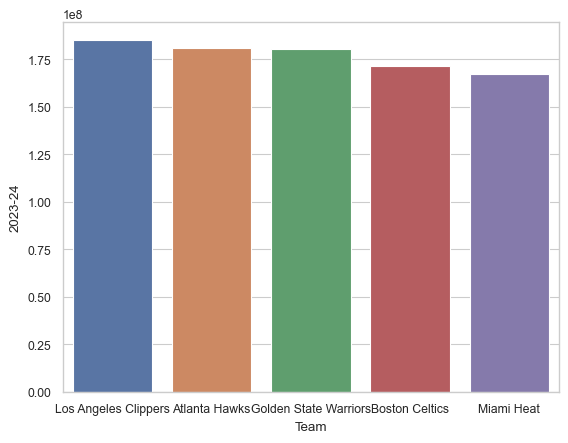

In [132]:
sns.barplot(x='Team',y='2023-24', data=df.nlargest(5,'2023-24'))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2023-24', ylabel='Density'>

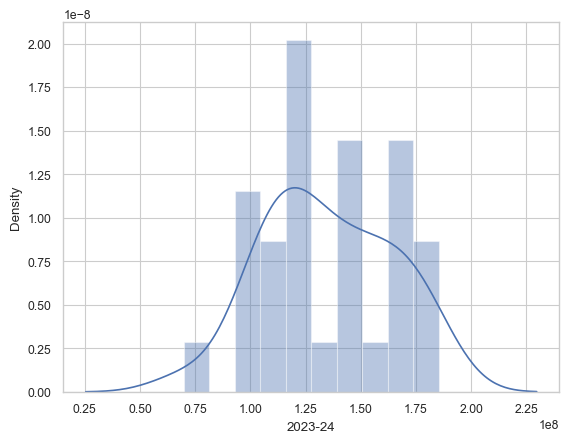

In [133]:
sns.distplot(df['2023-24'],bins=10)

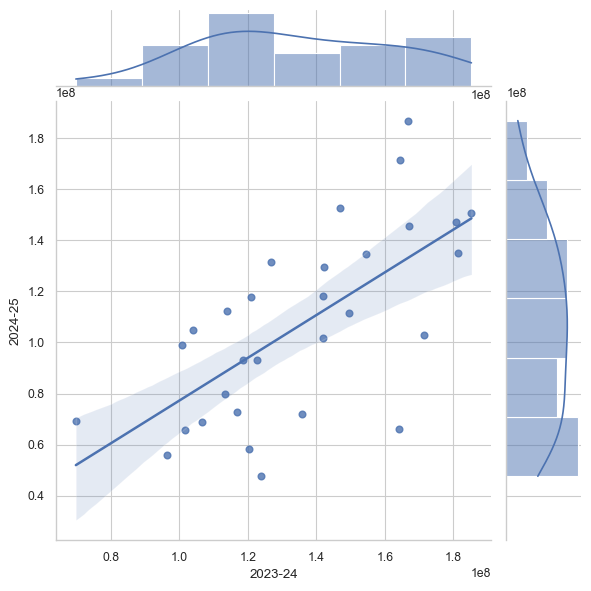

In [134]:
sns.jointplot(x='2023-24',y='2024-25',data=df,kind='reg')